# 3. Cluster analysis

# Import code

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering

In [2]:
import prepostprocessing.pre_processing as preproc

In [3]:
area1_int_df = preproc.load_obj("area1_int_df")
area1a_int_df = preproc.load_obj("area1a_int_df")

area2_int_df = preproc.load_obj("area2_int_df")
area2a_int_df = preproc.load_obj("area2a_int_df")
area2b_int_df = preproc.load_obj("area2b_int_df")

area3_int_df = preproc.load_obj("area3_int_df")
area3a_int_df = preproc.load_obj("area3a_int_df")
area3c_int_df = preproc.load_obj("area3c_int_df")

area4_int_df = preproc.load_obj("area4_int_df")

area5_int_df = preproc.load_obj("area5_int_df")

combined_int_df = preproc.load_obj("combined_int_df")
Fe_combined_pca_df = preproc.load_obj("Fe_combined_pca_df")
MALI_combined_pca_df = preproc.load_obj("MALI_combined_pca_df")


area1_fe_pca_df = preproc.load_obj("area1_fe_pca_df")
area3_fe_pca_df = preproc.load_obj("area3_fe_pca_df")
area3a_fe_pca_df = preproc.load_obj("area3a_fe_pca_df")
area3c_fe_pca_df = preproc.load_obj("area3c_fe_pca_df")

area1_MALI_pca_df = preproc.load_obj("area1_MALI_pca_df")
area3_MALI_pca_df = preproc.load_obj("area3_MALI_pca_df")
area3a_MALI_pca_df = preproc.load_obj("area3a_MALI_pca_df")
area3c_MALI_pca_df = preproc.load_obj("area3c_MALI_pca_df")


pca_df = preproc.load_obj("mineralogy_pca_df1")
metadata = preproc.load_obj("metadata")

___

In [4]:
# Area 3b not needed?
# --> is the zoomed in area of 3a with very small amount of datapoints, so won't say much  
# OKAY
area3b_int_df = preproc.load_obj("area3b_int_df")

FileNotFoundError: [Errno 2] No such file or directory: '../_DATA/_obj/area3b_int_df.pkl'

# Idividual areas

## Area1

In [4]:
area1_int_df = area1_int_df.iloc[:, 0:2]

In [5]:
area1_int_df

,PC01,PC02
2809,-0.871616,-0.061954
2810,-0.867083,-0.061057
2811,-0.863637,-0.060284
2812,-0.881656,-0.001032
2813,-0.881230,-0.000526
...,...,...
205097,-0.049269,-0.211667
205541,-0.047306,-0.221904
205542,-0.047587,-0.220724
205543,-0.047827,-0.219399


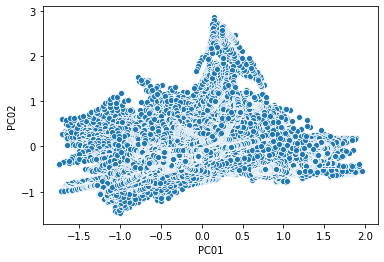

In [7]:
sns.scatterplot(x="PC01", y="PC02", data=area1_int_df)
plt.show();

In [8]:
X = area1_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

Wall time: 0 ns


In [9]:
%%time
cluster.fit_predict(X)

Wall time: 3min 43s


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

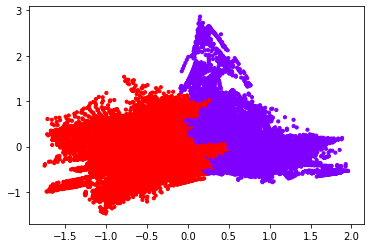

In [11]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area1_agglomerative_clustering.pdf")
plt.show();

In [12]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [13]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
55408,1
55409,1
55410,1
55411,1


In [17]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/cluster_control_points.xlsx", index=True)

In [18]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/control_points_count.xlsx")

----

## Area2


In [5]:
area2_int_df = area2_int_df.iloc[:, 0:2]

In [6]:
area2_int_df

,PC01,PC02
3579,0.034400,-0.215940
3580,0.033310,-0.214889
3581,0.032483,-0.213649
3582,0.031967,-0.212275
3826,-0.457255,-0.222506
...,...,...
133140,-0.733272,-0.409852
133141,-0.732883,-0.410611
133142,-0.732593,-0.411653
133144,-0.732359,-0.414225


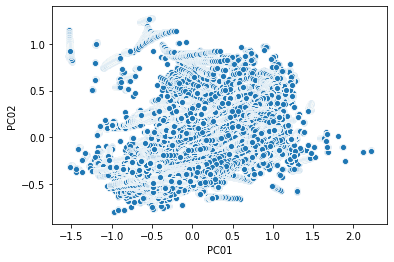

In [21]:
sns.scatterplot(x="PC01", y="PC02", data=area2_int_df)
plt.show();

In [22]:
X = area2_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [23]:
%%time
cluster.fit_predict(X)

Wall time: 38min 44s


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

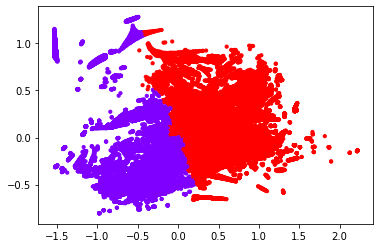

In [24]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area2_agglomerative_clustering.pdf")
plt.show();

In [25]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [26]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
80992,0
80993,0
80994,0
80995,0


In [27]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/cluster_control_points.xlsx", index=True)

In [28]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2/control_points_count.xlsx")

----

----

## Area3

In [8]:
area3_int_df = area3_int_df.iloc[:, 0:2]

In [9]:
area3_int_df

,PC01,PC02
11189,0.378920,-0.911470
11190,0.372451,-0.917743
11191,0.365942,-0.923789
11192,0.359717,-0.929365
11596,0.397430,-0.899513
...,...,...
160540,-0.778978,-0.744624
160541,-0.767105,-0.745673
160542,-0.747192,-0.746888
160543,-0.753829,-0.742470


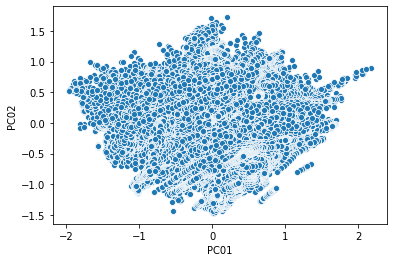

In [10]:
sns.scatterplot(x="PC01", y="PC02", data=area3_int_df)
plt.show();

In [11]:
X = area3_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [12]:
%%time
cluster.fit_predict(X)

Wall time: 3min 11s


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

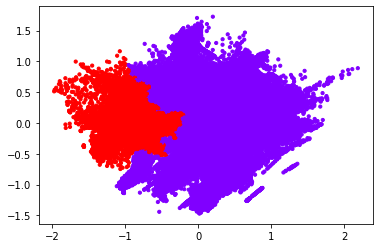

In [13]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3_agglomerative_clustering.pdf")
plt.show();

In [14]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [15]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
54450,0
54451,0
54452,0
54453,0


In [16]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/cluster_control_points.xlsx", index=True)

In [17]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3/control_points_count.xlsx")

----

----

## Area4

In [18]:
area4_int_df = area4_int_df.iloc[:, 0:4]

In [19]:
area4_int_df

,PC01,PC02,PC03,PC04
2499,0.485689,-0.125740,-0.055342,0.246923
2500,0.486885,-0.126015,-0.055743,0.246641
2501,0.487637,-0.126147,-0.056041,0.246396
2502,0.487965,-0.126145,-0.056236,0.246190
2503,0.487892,-0.126016,-0.056330,0.246027
...,...,...,...,...
134972,-0.823145,-0.212690,-0.299398,0.431477
134973,-0.825401,-0.210903,-0.299287,0.432355
134974,-0.828128,-0.208760,-0.299055,0.433406
134975,-0.831322,-0.206267,-0.298698,0.434626


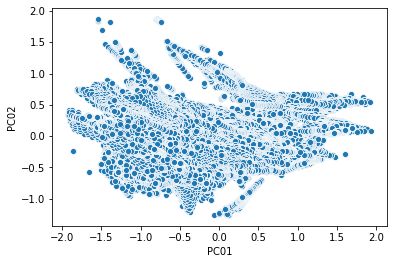

In [20]:
sns.scatterplot(x="PC01", y="PC02", data=area4_int_df)
plt.show();

In [21]:
X = area4_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [22]:
%%time
cluster.fit_predict(X)

Wall time: 4min 5s


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

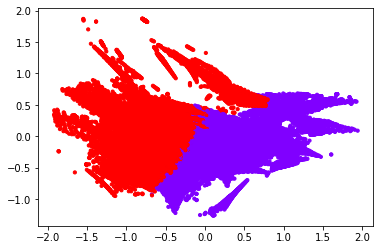

In [23]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area4_agglomerative_clustering.pdf")
plt.show();

In [24]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [25]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
59474,1
59475,1
59476,1
59477,1


In [26]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/cluster_control_points.xlsx", index=True)

In [27]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area4/control_points_count.xlsx")

----

-----

## Area5

In [28]:
area5_int_df = area5_int_df.iloc[:, 0:3]

In [29]:
area5_int_df

,PC01,PC02,PC03
1996,-1.404360,-0.816303,0.365033
1997,-1.404402,-0.816395,0.364919
1998,-1.404444,-0.816486,0.364810
1999,-1.404485,-0.816572,0.364707
2000,-1.404526,-0.816654,0.364611
...,...,...,...
123582,-0.516033,0.133608,0.090183
123583,-0.516086,0.133643,0.090197
123584,-0.516128,0.133679,0.090211
123585,-0.516157,0.133716,0.090226


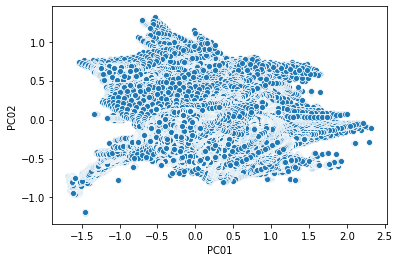

In [30]:
sns.scatterplot(x="PC01", y="PC02", data=area5_int_df)
plt.show();

In [31]:
X = area5_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

Wall time: 998 µs


In [32]:
%%time
cluster.fit_predict(X)

Wall time: 3min 51s


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

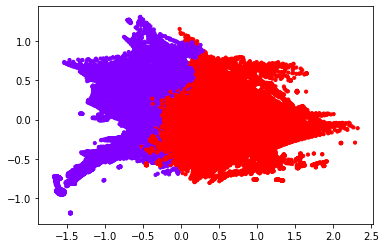

In [33]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area5_agglomerative_clustering.pdf")
plt.show();

In [34]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [35]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
60204,0
60205,0
60206,0
60207,0


In [36]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/cluster_control_points.xlsx", index=True)

In [37]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area5/control_points_count.xlsx")

# Zoomed-in areas

## Area 1a

In [38]:
area1a_int_df = area1a_int_df.iloc[:, 0:3]

In [39]:
area1a_int_df

,PC01,PC02,PC03
3952,-0.375048,0.048924,-0.157410
3953,-0.375202,0.048647,-0.157928
3954,-0.375359,0.048372,-0.158428
3955,-0.375516,0.048099,-0.158904
3956,-0.375672,0.047831,-0.159354
...,...,...,...
106858,-0.442842,-0.093954,-0.062743
106859,-0.442558,-0.091236,-0.060272
106860,-0.442276,-0.088602,-0.057838
106861,-0.441999,-0.086065,-0.055457


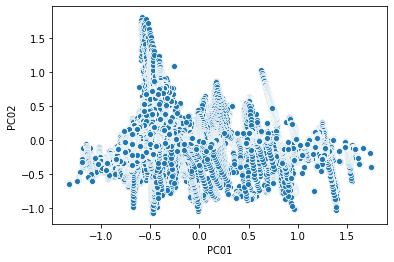

In [40]:
sns.scatterplot(x="PC01", y="PC02", data=area1a_int_df)
plt.show();

In [41]:
%%time
X = area1a_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 1min 45s


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

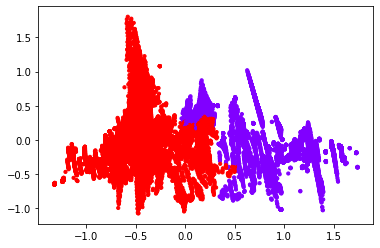

In [42]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area1a_agglomerative_clustering.pdf")
plt.show();

In [43]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [44]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
43558,1
43559,1
43560,1
43561,1


In [46]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1a/cluster_control_points.xlsx", index=True)

In [47]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1a/control_points_count.xlsx")

## Area 2a

In [48]:
area2a_int_df = area2a_int_df.iloc[:, 0:3]

In [49]:
area2a_int_df

,PC01,PC02,PC03
7431,-0.008096,0.385552,-0.048256
7432,-0.015158,0.380568,-0.050942
7433,-0.022820,0.375572,-0.053497
7434,-0.031080,0.370576,-0.055911
7435,-0.039937,0.365588,-0.058179
...,...,...,...
126270,0.391564,-0.274296,-0.243824
126271,0.381569,-0.275976,-0.245940
126272,0.371750,-0.277653,-0.248107
126273,0.362130,-0.279324,-0.250317


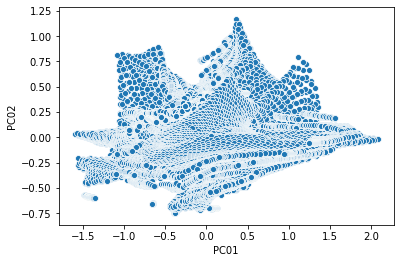

In [50]:
sns.scatterplot(x="PC01", y="PC02", data=area2a_int_df)
plt.show();

In [51]:
%%time
X = area2a_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 7s


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

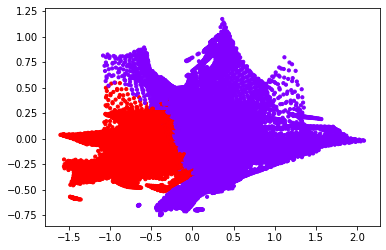

In [52]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area2a_agglomerative_clustering.pdf")
plt.show();

In [53]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [54]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
49856,0
49857,0
49858,0
49859,0


In [55]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area2a/cluster_control_points.xlsx", index=True)

In [56]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2a/control_points_count.xlsx")

## Area 2b

In [58]:
area2b_int_df = area2b_int_df.iloc[:, 0:3]

In [59]:
area2b_int_df

,PC01,PC02,PC03
3448,1.309549,-0.681230,-3.246705e-16
3449,1.309478,-0.681499,1.890755e-16
3450,1.378581,-0.736312,4.353664e-16
3451,1.378522,-0.736591,1.240484e-16
3452,1.378465,-0.736868,-2.524243e-18
...,...,...,...
117403,-0.202210,0.398705,4.620049e-16
117404,-0.202332,0.398653,5.986516e-16
117405,-0.202436,0.398628,1.084135e-15
117406,-0.202522,0.398628,-2.664524e-18


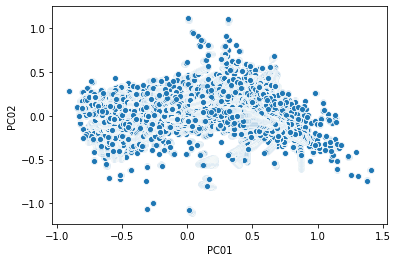

In [60]:
sns.scatterplot(x="PC01", y="PC02", data=area2b_int_df)
plt.show();

In [61]:
%%time
X = area2b_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 10min 8s


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

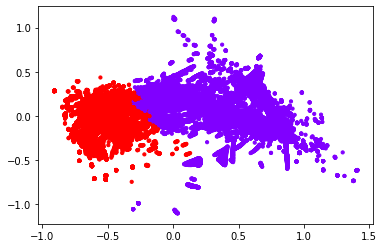

In [62]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area2b_agglomerative_clustering.pdf")
plt.show();

In [63]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [64]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
66325,0
66326,0
66327,0
66328,0


In [65]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area2b/cluster_control_points.xlsx", index=True)

In [66]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area2b/control_points_count.xlsx")

## Area 3a

In [67]:
area3a_int_df = area3a_int_df.iloc[:, 0:3]

In [68]:
area3a_int_df

,PC01,PC02,PC03
12193,-0.728068,-0.519047,-6.432864e-16
12194,-0.728539,-0.519194,2.309871e-16
12195,-0.728996,-0.519337,7.500351e-17
12715,-0.726479,-0.518587,-3.522102e-16
12716,-0.727015,-0.518759,-4.717732e-16
...,...,...,...
147437,0.670138,-0.095630,8.080205e-16
147438,0.670334,-0.095393,5.399568e-16
147439,0.670534,-0.095154,5.796134e-16
147440,0.670739,-0.094914,2.196856e-16


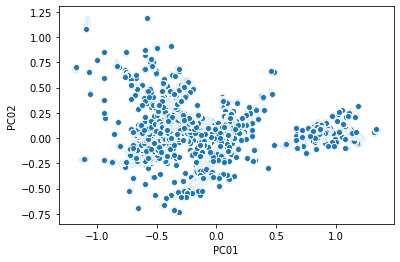

In [69]:
sns.scatterplot(x="PC01", y="PC02", data=area3a_int_df)
plt.show();

In [70]:
%%time
X = area3a_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 12s


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

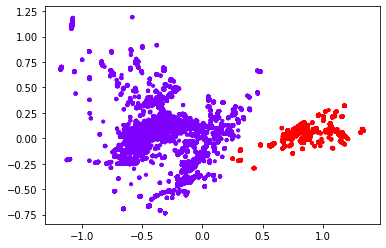

In [71]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3a_agglomerative_clustering.pdf")
plt.show();

In [72]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [73]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
53001,1
53002,1
53003,1
53004,1


In [74]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area3a/cluster_control_points.xlsx", index=True)

In [75]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3a/control_points_count.xlsx")

## Area 3c

In [76]:
area3c_int_df = area3c_int_df.iloc[:, 0:3]

In [77]:
area3c_int_df

,PC01,PC02,PC03
5341,1.161454,-0.861487,-6.040973e-16
5641,1.157301,-0.862900,-6.055621e-16
5642,1.159331,-0.862092,-7.804212e-16
5643,1.161449,-0.861274,-7.690333e-16
5644,1.163653,-0.860446,-7.623459e-16
...,...,...,...
97322,0.530566,0.906701,-9.150829e-16
97323,0.530589,0.906687,-9.771044e-16
97324,0.530604,0.906669,-1.016789e-15
97325,0.530612,0.906647,-9.103115e-16


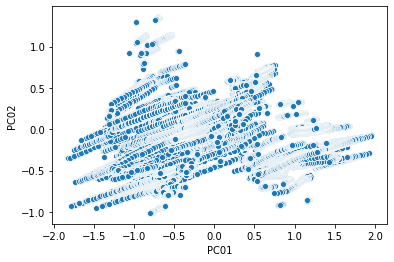

In [78]:
sns.scatterplot(x="PC01", y="PC02", data=area3c_int_df)
plt.show();

In [79]:
%%time
X = area3c_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 12s


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

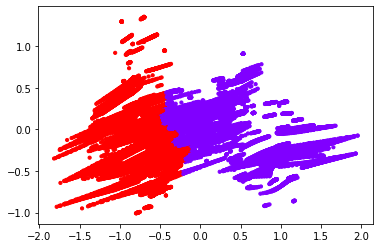

In [80]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3c_agglomerative_clustering.pdf")
plt.show();

In [81]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [82]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
51381,0
51382,0
51383,0
51384,0


In [83]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Area3c/cluster_control_points.xlsx", index=True)

In [84]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area3c/control_points_count.xlsx")

# Feature engineering

## Area1

### Fe_Number

In [4]:
area1_fe_pca_df

,PC01,PC02
2809,0.938714,0.309283
2810,0.921931,0.308904
2811,0.909019,0.308613
2812,1.146122,0.226411
2813,1.144319,0.226196
...,...,...
205097,0.280382,-0.061245
205541,0.303196,-0.064513
205542,0.300450,-0.064074
205543,0.297346,-0.063620


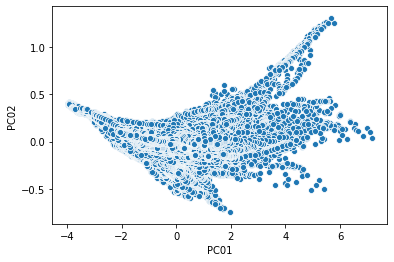

In [5]:
sns.scatterplot(x="PC01", y="PC02", data=area1_fe_pca_df)
plt.show();

In [6]:
%%time
X = area1_fe_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 50s


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

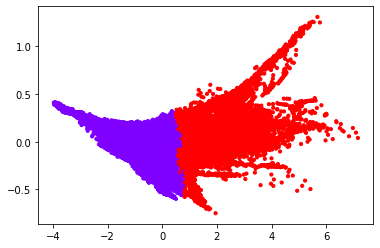

In [7]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area1_fe_agglomerative_clustering.pdf")
plt.show();

In [8]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [9]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
55408,0
55409,0
55410,0
55411,0


In [10]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area1_fe.xlsx", index=True)

In [11]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area1_fe_count.xlsx")

----

### MALI

In [12]:
area1_MALI_pca_df

,PC01,PC02,PC03,PC04
2809,2.496573,1.157361,0.000929,0.055013
2810,2.480232,1.162826,-0.003142,0.056864
2811,2.467697,1.167121,-0.006238,0.058257
2812,2.390083,0.754924,0.033241,-0.026902
2813,2.387792,0.755011,0.032847,-0.026923
...,...,...,...,...
205097,0.144340,-0.592664,-0.165607,0.013569
205541,0.153043,-0.606910,-0.165930,0.016710
205542,0.152218,-0.604871,-0.165928,0.016385
205543,0.151076,-0.602801,-0.165906,0.016002


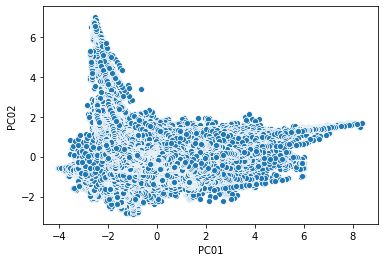

In [13]:
sns.scatterplot(x="PC01", y="PC02", data=area1_MALI_pca_df)
plt.show();

In [14]:
%%time
X = area1_MALI_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 3min 52s


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

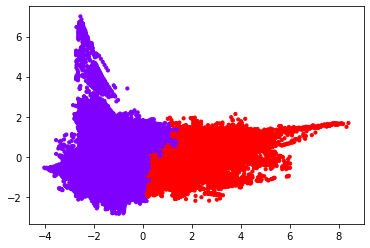

In [15]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area1_MALI_agglomerative_clustering.pdf")
plt.show();

In [16]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [17]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
55408,0
55409,0
55410,0
55411,0


In [18]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area1_MALI.xlsx", index=True)

In [19]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area1_MALI_count.xlsx")

### combining Fe and Mali

In [55]:
cluster_Fe1 = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area1_fe.xlsx", index=False, usecols =[1])
cluster_MALI1 = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area1_MALI.xlsx", index=True, usecols =[1])

In [56]:
cluster_MALI1

,0
0,1
1,1
2,1
3,1
4,1
...,...
55408,0
55409,0
55410,0
55411,0


In [57]:
cluster_Fe1.columns = ["group1"]
cluster_MALI1.columns = ["group2"]


In [58]:
cluster_Fe1["group1"] = (cluster_Fe1["group1"] +1) 
cluster_MALI1["group2"] = (cluster_MALI1["group2"] +1) *10

In [59]:
cluster_MALI1

,group2
0,20
1,20
2,20
3,20
4,20
...,...
55408,10
55409,10
55410,10
55411,10


In [60]:
cluster_frost1 = pd.concat([cluster_Fe1, cluster_MALI1], axis = 1)

In [61]:
cluster_frost1['group'] = cluster_frost1['group1']+cluster_frost1['group2']

In [62]:
cluster_frost1 = cluster_frost1.drop('group1', 1)
cluster_frost1 = cluster_frost1.drop('group2', 1)

In [63]:
cluster_frost1['group'] = cluster_frost1['group'].replace(to_replace=11,value=1)
cluster_frost1['group'] = cluster_frost1['group'].replace(to_replace=12,value=2)
cluster_frost1['group'] = cluster_frost1['group'].replace(to_replace=21,value=3)
cluster_frost1['group'] = cluster_frost1['group'].replace(to_replace=22,value=4)

In [64]:
cluster_frost1

,group
0,4
1,4
2,4
3,4
4,4
...,...
55408,1
55409,1
55410,1
55411,1


In [65]:
cluster_frost1.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area1.xlsx", index=True)

In [66]:
cluster_frost1.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area1_counts.xlsx", index=True)

## Area3

### Fe_Number

In [20]:
area3_fe_pca_df

,PC01,PC02
11189,1.838356,0.273088
11190,1.864213,0.272915
11191,1.889279,0.272613
11192,1.912526,0.272221
11596,1.787970,0.275881
...,...,...
160540,2.537741,-0.206649
160541,2.518297,-0.201878
160542,2.484577,-0.193821
160543,2.484311,-0.195912


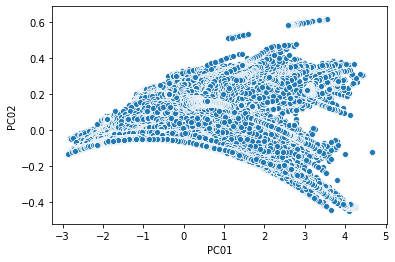

In [21]:
sns.scatterplot(x="PC01", y="PC02", data=area3_fe_pca_df)
plt.show();

In [22]:
%%time
X = area3_fe_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 18s


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

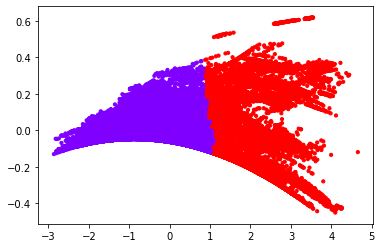

In [23]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3_fe_agglomerative_clustering.pdf")
plt.show();

In [24]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [25]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
54450,1
54451,1
54452,1
54453,1


In [26]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3_fe.xlsx", index=True)

In [27]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3_fe_count.xlsx")

-----

### Mali

In [28]:
area3_MALI_pca_df

,PC01,PC02,PC03,PC04
11189,1.168947,-0.608634,0.154386,-0.013127
11190,1.202208,-0.606859,0.155868,-0.013316
11191,1.234997,-0.604974,0.157232,-0.013490
11192,1.265847,-0.603084,0.158438,-0.013644
11596,1.092515,-0.613622,0.153359,-0.012715
...,...,...,...,...
160540,4.031667,0.190545,-0.050842,0.035776
160541,3.991245,0.177512,-0.050686,0.034640
160542,3.921999,0.155714,-0.050440,0.032732
160543,3.930978,0.161552,-0.051129,0.033085


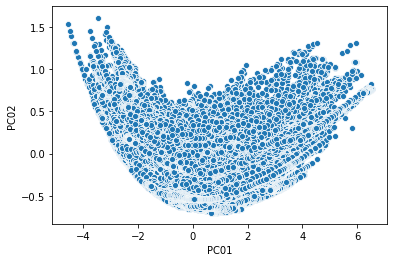

In [29]:
sns.scatterplot(x="PC01", y="PC02", data=area3_MALI_pca_df)
plt.show();

In [30]:
%%time
X = area3_MALI_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 16s


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

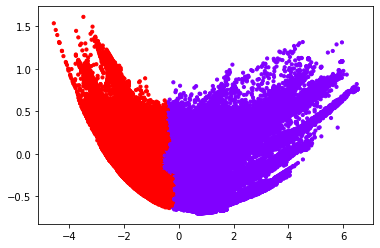

In [31]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3_MALI_agglomerative_clustering.pdf")
plt.show();

In [32]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [33]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
54450,0
54451,0
54452,0
54453,0


In [34]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3_MALI.xlsx", index=True)

In [35]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3_MALI_count.xlsx")

### combining Fe and Mali

In [103]:
cluster_Fe3 = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3_fe.xlsx", index=False, usecols =[1])
cluster_MALI3 = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3_MALI.xlsx", index=True, usecols =[1])

In [104]:
cluster_MALI3

,0
0,0
1,0
2,0
3,0
4,0
...,...
54450,0
54451,0
54452,0
54453,0


In [105]:
cluster_Fe3.columns = ["group1"]
cluster_MALI3.columns = ["group2"]

In [106]:
cluster_Fe3["group1"] = (cluster_Fe3["group1"] +1) 
cluster_MALI3["group2"] = (cluster_MALI3["group2"] +1) *10

In [107]:
cluster_MALI3

,group2
0,10
1,10
2,10
3,10
4,10
...,...
54450,10
54451,10
54452,10
54453,10


In [108]:
cluster_frost3 = pd.concat([cluster_Fe3, cluster_MALI3], axis = 1)

In [109]:
cluster_frost3['group'] = cluster_frost3['group1']+cluster_frost3['group2']

In [110]:
cluster_frost3 = cluster_frost3.drop('group1', 1)
cluster_frost3 = cluster_frost3.drop('group2', 1)

In [111]:
cluster_frost3['group'] = cluster_frost3['group'].replace(to_replace=11,value=1)
cluster_frost3['group'] = cluster_frost3['group'].replace(to_replace=12,value=2)
cluster_frost3['group'] = cluster_frost3['group'].replace(to_replace=21,value=3)
cluster_frost3['group'] = cluster_frost3['group'].replace(to_replace=22,value=4)

In [112]:
cluster_frost3

,group
0,2
1,2
2,2
3,2
4,2
...,...
54450,2
54451,2
54452,2
54453,2


In [113]:
cluster_frost3.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area3.xlsx", index=True)

In [114]:
cluster_frost3.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area3_counts.xlsx", index=True)

## Area3a

### Fe_Number

In [36]:
area3a_fe_pca_df

,PC01,PC02
12193,-1.694930,-0.075084
12194,-1.695632,-0.075151
12195,-1.696314,-0.075216
12715,-1.692563,-0.074858
12716,-1.693365,-0.074934
...,...,...
147437,1.443855,0.023746
147438,1.444565,0.023728
147439,1.445291,0.023709
147440,1.446031,0.023690


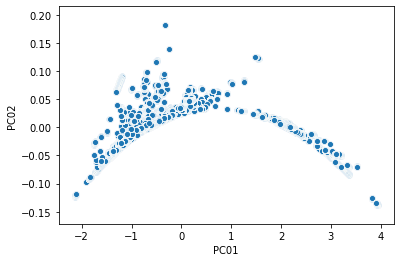

In [37]:
sns.scatterplot(x="PC01", y="PC02", data=area3a_fe_pca_df)
plt.show();

In [38]:
%%time
X = area3a_fe_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 1s


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

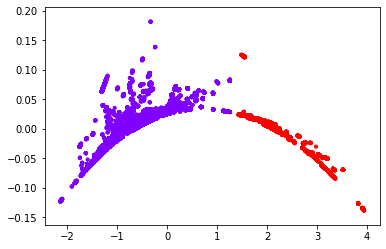

In [39]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3a_fe_agglomerative_clustering.pdf")
plt.show();

In [40]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [41]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
53001,1
53002,1
53003,1
53004,1


In [42]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3a_fe.xlsx", index=True)

In [43]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3a_fe_count.xlsx")

----

### Mali

In [44]:
area3a_MALI_pca_df

,PC01,PC02,PC03,PC04
12193,-2.836710,-0.042299,0.101500,0.033400
12194,-2.837984,-0.042131,0.101609,0.033440
12195,-2.839220,-0.041968,0.101715,0.033479
12715,-2.832448,-0.042876,0.101137,0.033267
12716,-2.833904,-0.042686,0.101261,0.033313
...,...,...,...,...
147437,1.943753,-0.154863,-0.003715,-0.020061
147438,1.944917,-0.154693,-0.003718,-0.020037
147439,1.946102,-0.154521,-0.003720,-0.020013
147440,1.947306,-0.154348,-0.003722,-0.019989


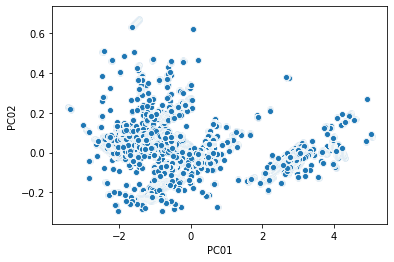

In [45]:
sns.scatterplot(x="PC01", y="PC02", data=area3a_MALI_pca_df)
plt.show();

In [46]:
%%time
X = area3a_MALI_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 1min 49s


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

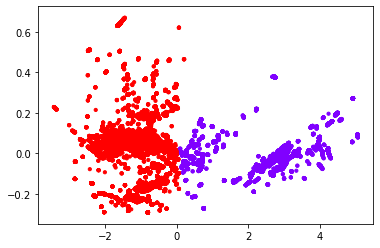

In [47]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3a_MALI_agglomerative_clustering.pdf")
plt.show();

In [48]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [49]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
53001,0
53002,0
53003,0
53004,0


In [50]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3a_MALI.xlsx", index=True)

In [51]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3a_MALI_count.xlsx")

### combining Fe and Mali

In [79]:
cluster_Fe3a = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3a_fe.xlsx", index=False, usecols =[1])
cluster_MALI3a = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3a_MALI.xlsx", index=True, usecols =[1])

In [80]:
cluster_MALI3a

,0
0,1
1,1
2,1
3,1
4,1
...,...
53001,0
53002,0
53003,0
53004,0


In [81]:
cluster_Fe3a.columns = ["group1"]
cluster_MALI3a.columns = ["group2"]

In [82]:
cluster_Fe3a["group1"] = (cluster_Fe3a["group1"] +1) 
cluster_MALI3a["group2"] = (cluster_MALI3a["group2"] +1) * 10

In [83]:
cluster_MALI3a

,group2
0,20
1,20
2,20
3,20
4,20
...,...
53001,10
53002,10
53003,10
53004,10


In [84]:
cluster_frost3a = pd.concat([cluster_Fe3a, cluster_MALI3a], axis = 1)

In [85]:
cluster_frost3a['group'] = cluster_frost3a['group1']+cluster_frost3a['group2']

In [86]:
cluster_frost3a = cluster_frost3a.drop('group1', 1)
cluster_frost3a = cluster_frost3a.drop('group2', 1)

In [87]:
cluster_frost3a['group'] = cluster_frost3a['group'].replace(to_replace=11,value=1)
cluster_frost3a['group'] = cluster_frost3a['group'].replace(to_replace=12,value=2)
cluster_frost3a['group'] = cluster_frost3a['group'].replace(to_replace=21,value=3)
cluster_frost3a['group'] = cluster_frost3a['group'].replace(to_replace=22,value=4)

In [88]:
cluster_frost3a

,group
0,3
1,3
2,3
3,3
4,3
...,...
53001,2
53002,2
53003,2
53004,2


In [89]:
cluster_frost3a.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area3a.xlsx", index=True)

In [90]:
cluster_frost3a.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area3a_counts.xlsx", index=True)

----

## Area3c

### Fe_Number

In [52]:
area3c_fe_pca_df

,PC01,PC02
5341,-1.578094,-0.165631
5641,-1.584633,-0.165673
5642,-1.581163,-0.165639
5643,-1.577599,-0.165606
5644,-1.573944,-0.165576
...,...,...
97322,3.642691,-0.191732
97323,3.642655,-0.191736
97324,3.642592,-0.191736
97325,3.642503,-0.191730


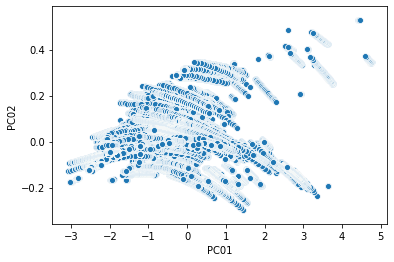

In [53]:
sns.scatterplot(x="PC01", y="PC02", data=area3c_fe_pca_df)
plt.show();

In [54]:
%%time
X = area3c_fe_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 7s


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

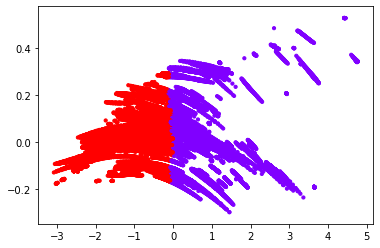

In [55]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3c_fe_agglomerative_clustering.pdf")
plt.show();

In [56]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [57]:
cluster_groups

,0
0,1
1,1
2,1
3,1
4,1
...,...
51381,0
51382,0
51383,0
51384,0


In [58]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3c_fe.xlsx", index=True)

In [59]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3c_fe_count.xlsx")

----

### Mali

In [60]:
area3c_MALI_pca_df

,PC01,PC02,PC03,PC04
5341,0.514470,-1.665453,-0.136943,0.064094
5641,0.526505,-1.665073,-0.137541,0.064240
5642,0.520288,-1.665131,-0.137235,0.064155
5643,0.513869,-1.665216,-0.136915,0.064068
5644,0.507253,-1.665329,-0.136583,0.063981
...,...,...,...,...
97322,-4.099104,1.056952,0.209843,0.030274
97323,-4.099108,1.056924,0.209850,0.030272
97324,-4.099076,1.056890,0.209850,0.030269
97325,-4.099007,1.056849,0.209844,0.030267


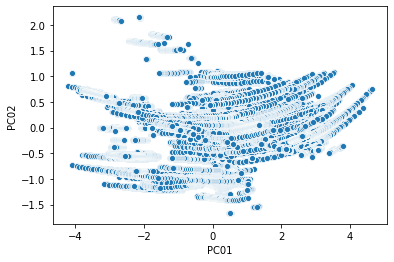

In [61]:
sns.scatterplot(x="PC01", y="PC02", data=area3c_MALI_pca_df)
plt.show();

In [62]:
%%time
X = area3c_MALI_pca_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

Wall time: 2min 12s


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

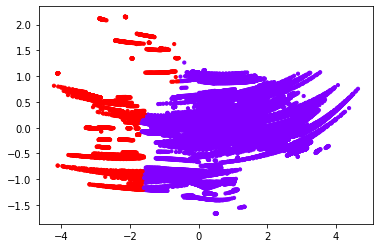

In [63]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.savefig("../_FIGURES/clustering/Area3c_MALI_agglomerative_clustering.pdf")
plt.show();

In [64]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [65]:
cluster_groups

,0
0,0
1,0
2,0
3,0
4,0
...,...
51381,1
51382,1
51383,1
51384,1


In [66]:
cluster_groups.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3c_MALI.xlsx", index=True)

In [67]:
cluster_groups.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3c_MALI_count.xlsx")

### combining Fe and Mali

In [91]:
cluster_Fe3c = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3c_fe.xlsx", index=False, usecols =[1])
cluster_MALI3c = pd.read_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/Area3c_MALI.xlsx", index=True, usecols =[1])

In [92]:
cluster_MALI3c

,0
0,0
1,0
2,0
3,0
4,0
...,...
51381,1
51382,1
51383,1
51384,1


In [93]:
cluster_Fe3c.columns = ["group1"]
cluster_MALI3c.columns = ["group2"]

In [94]:
cluster_Fe3c["group1"] = (cluster_Fe3c["group1"] +1) 
cluster_MALI3c["group2"] = (cluster_MALI3c["group2"] +1) * 10

In [95]:
cluster_MALI3c

,group2
0,10
1,10
2,10
3,10
4,10
...,...
51381,20
51382,20
51383,20
51384,20


In [96]:
cluster_frost3c = pd.concat([cluster_Fe3c, cluster_MALI3c], axis = 1)

In [97]:
cluster_frost3c['group'] = cluster_frost3c['group1']+cluster_frost3c['group2']

In [98]:
cluster_frost3c = cluster_frost3c.drop('group1', 1)
cluster_frost3c = cluster_frost3c.drop('group2', 1)

In [99]:
cluster_frost3c['group'] = cluster_frost3c['group'].replace(to_replace=11,value=1)
cluster_frost3c['group'] = cluster_frost3c['group'].replace(to_replace=12,value=2)
cluster_frost3c['group'] = cluster_frost3c['group'].replace(to_replace=21,value=3)
cluster_frost3c['group'] = cluster_frost3c['group'].replace(to_replace=22,value=4)

In [100]:
cluster_frost3c

,group
0,2
1,2
2,2
3,2
4,2
...,...
51381,3
51382,3
51383,3
51384,3


In [101]:
cluster_frost3c.to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area3c.xlsx", index=True)

In [102]:
cluster_frost3c.iloc[:, 0].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Feature_engineering/combined/Area3c_counts.xlsx", index=True)

----

# combined areas
**Did not execute the cells in this section as they are not relevant here.**

## using PCA's

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
area1_int_df = area1_int_df.iloc[:, 0: 2]

In [ ]:
area1_int_df

In [ ]:
sns.scatterplot(x="PC01", y="PC02", data=area1_int_df)
plt.show();

In [ ]:
%%time
X = area1_int_df.values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [ ]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [ ]:
cluster_groups

In [ ]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [ ]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [ ]:
clustering

In [ ]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/cluster_control_points.xlsx", index=True)

In [ ]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/control_points_count.xlsx")

----

In [ ]:
clustering1= clustering.loc[clustering['area'] == 1]
clustering2= clustering.loc[clustering['area'] == 2]
clustering3= clustering.loc[clustering['area'] == 3]
clustering4= clustering.loc[clustering['area'] == 4]
clustering5= clustering.loc[clustering['area'] == 5]

In [ ]:
clustering1_J = clustering1.loc[clustering1['time'] == 'J']
clustering1_Tr = clustering1.loc[clustering1['time'] == 'Tr']
clustering1_Tr_J = clustering1.loc[clustering1['time'] == 'Tr-J']
clustering1_Mz = clustering1.loc[clustering1['time'] == 'Mz']
clustering1_K = clustering1.loc[clustering1['time'] == 'K']

clustering1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_J.xlsx")
clustering1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Tr.xlsx")
clustering1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Tr_J.xlsx")
clustering1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_Mz.xlsx")
clustering1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area1_K.xlsx")

In [ ]:
clustering2_J = clustering2.loc[clustering2['time'] == 'J']
clustering2_Tr = clustering2.loc[clustering2['time'] == 'Tr']
clustering2_Pg = clustering2.loc[clustering2['time'] == 'Pg']
clustering2_K = clustering2.loc[clustering2['time'] == 'K']

clustering2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_J.xlsx")
clustering2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_Tr.xlsx")
clustering2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_Pg.xlsx")
clustering2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area2_K.xlsx")

In [ ]:
clustering3_J = clustering3.loc[clustering3['time'] == 'J']
clustering3_Tr = clustering3.loc[clustering3['time'] == 'Tr']
clustering3_Pg = clustering3.loc[clustering3['time'] == 'Pg']
clustering3_K = clustering3.loc[clustering3['time'] == 'K']

clustering3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_J.xlsx")
clustering3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_Tr.xlsx")
clustering3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_Pg.xlsx")
clustering3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area3_K.xlsx")

In [ ]:
clustering4_J = clustering4.loc[clustering4['time'] == 'J']
clustering4_Mz = clustering4.loc[clustering4['time'] == 'Mz']
clustering4_Pg = clustering4.loc[clustering4['time'] == 'Pg']
clustering4_K = clustering4.loc[clustering4['time'] == 'K']

clustering4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_J.xlsx")
clustering4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_Mz.xlsx")
clustering4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_Pg.xlsx")
clustering4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area4_K.xlsx")

In [ ]:
clustering5_Mz = clustering5.loc[clustering5['time'] == 'Mz']
clustering5_Pg = clustering5.loc[clustering5['time'] == 'Pg']
clustering5_K = clustering5.loc[clustering5['time'] == 'K']

clustering5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area5_Mz.xlsx")
clustering5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area5_Pg.xlsx")
clustering5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_counts_area5_K.xlsx")

In [ ]:
coordinates = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
#coordinates = pd.read_excel("../_INTERPOLATION/area5.xlsx", index_col=0, usecols=[0, 5, 6])

In [ ]:
cluster_plot = pd.concat([coordinates, clustering], axis=1)
cluster_plot = cluster_plot.dropna()

In [ ]:
cluster_plot

In [ ]:
cluster_plot.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/groups_try.xlsx", index=True)

----